In [ ]:
#!pip install tensorflow
#!pip install tf-keras
#%pip install torch
#%pip install transformers

import pandas as pd
import numpy as np

In [3]:
df_tweets = pd.read_csv("stock_tweets_kaggle.csv")
df_tweets.head()

,Date,Tweet,Stock Name,Company Name
0,2022-09-29 23:41:16+00:00,Mainstream media has done an amazing job at br...,TSLA,"Tesla, Inc."
1,2022-09-29 23:24:43+00:00,Tesla delivery estimates are at around 364k fr...,TSLA,"Tesla, Inc."
2,2022-09-29 23:18:08+00:00,3/ Even if I include 63.0M unvested RSUs as of...,TSLA,"Tesla, Inc."
3,2022-09-29 22:40:07+00:00,@RealDanODowd @WholeMarsBlog @Tesla Hahaha why...,TSLA,"Tesla, Inc."
4,2022-09-29 22:27:05+00:00,"@RealDanODowd @Tesla Stop trying to kill kids,...",TSLA,"Tesla, Inc."


In [4]:
df_apple = df_tweets[df_tweets["Stock Name"] == "AAPL"].copy()
df_apple

,Date,Tweet,Stock Name,Company Name
55958,2022-09-29 22:23:54+00:00,$NIO just because I'm down money doesn't mean ...,AAPL,Apple Inc.
55959,2022-09-29 20:37:01+00:00,After trading for 9+ years \n\nThis is how to ...,AAPL,Apple Inc.
55960,2022-09-29 20:19:43+00:00,Not something you see very often. \n-2 ATR mo...,AAPL,Apple Inc.
55961,2022-09-29 20:13:48+00:00,$AAPL was down almost 5% today. Rare to see it...,AAPL,Apple Inc.
55962,2022-09-29 19:50:00+00:00,$AAPL APPLE JUST FIRED ITS HEAD OF PROCUREMENT...,AAPL,Apple Inc.
...,...,...,...,...
61009,2021-09-30 15:37:52+00:00,"All about this trendline now on $AAPL, continu...",AAPL,Apple Inc.
61010,2021-09-30 15:30:03+00:00,This thread is just a broad overview of the ba...,AAPL,Apple Inc.
61011,2021-09-30 13:36:10+00:00,"In 2020, Tim Cook, CEO of $AAPL, earned $265,0...",AAPL,Apple Inc.
61012,2021-09-30 10:22:53+00:00,The media is really pushing hard for their big...,AAPL,Apple Inc.


In [ ]:
import torch
print(torch.__version__)

In [20]:
from transformers import AutoModel, AutoTokenizer
from transformers import pipeline, AutoModelForSequenceClassification

# Model used: https://huggingface.co/cardiffnlp/twitter-roberta-base-sentiment-latest?text=Covid+cases+are+increasing+fast%21
# Load tokenizer and model from Hugging Face Hub
model_name = "cardiffnlp/twitter-roberta-base-sentiment-latest"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name, output_hidden_states=True)
# for getting embeddings, it is important to have output_hidden_states=True, otherwise, you wont get embeddings

# Create a sentiment analysis pipeline using the loaded model and tokenizer
sentiment_pipeline = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

# Label_2: Positive
# Label_1: Neutral
# Label_0: Negative 
results_apple = [(tweet, sentiment_pipeline(tweet)) for tweet in df_apple["Tweet"]]
results_apple

# ~ 15 mins

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


[("$NIO just because I'm down money doesn't mean this is a bad investment. The whole market, everything sucks right now. 2-5 years from now, I'm confident it will pay off. Long the best $AAPL $AMZN $TSLA $GOOGL $NIO",
  [{'label': 'negative', 'score': 0.4823355972766876}]),
 ('After trading for 9+ years \n\nThis is how to find entries and exits and scale out of positions \n\nRT Like and Subscribe 🔔\n$SPY $SPX $QQQ $AAPL $AMD \n\nhttps://t.co/o9UBtIakxu',
  [{'label': 'neutral', 'score': 0.7913577556610107}]),
 ('Not something you see very often.  \n-2 ATR move on $AAPL https://t.co/CVLgPWHz3F',
  [{'label': 'neutral', 'score': 0.8344758152961731}]),
 ('$AAPL was down almost 5% today. Rare to see it sell off like this. Headline was fears of demand slowly triggered the BofA downgrade. \n\nDespite the fears, demand seems to be favorable for iPhone 14. At least for today.',
  [{'label': 'negative', 'score': 0.5712100267410278}]),
 ('$AAPL APPLE JUST FIRED ITS HEAD OF PROCUREMENT THAT HAD B

In [22]:
final_scores = []
for result in results_apple:
    sentiment = result[1][0]
    label = sentiment["label"]
    score = sentiment["score"]

    # LABEL_0: Negative
    # LABEL_1: Neutral
    # LABEL_2: Positive
    if label == "positive":
        final_scores.append(score)
    elif label == "negative":
        final_scores.append(-1*score)
    else:
        final_scores.append(0)
df_apple.loc[:,"score"] = final_scores
df_apple

# Score of 1: Very positive about Apple
# Score of 0: Very neutral about Apple
# Score of -1: Very negative about Apple

,Date,Tweet,Stock Name,Company Name,score
55958,2022-09-29 22:23:54+00:00,$NIO just because I'm down money doesn't mean ...,AAPL,Apple Inc.,-0.482336
55959,2022-09-29 20:37:01+00:00,After trading for 9+ years \n\nThis is how to ...,AAPL,Apple Inc.,0.000000
55960,2022-09-29 20:19:43+00:00,Not something you see very often. \n-2 ATR mo...,AAPL,Apple Inc.,0.000000
55961,2022-09-29 20:13:48+00:00,$AAPL was down almost 5% today. Rare to see it...,AAPL,Apple Inc.,-0.571210
55962,2022-09-29 19:50:00+00:00,$AAPL APPLE JUST FIRED ITS HEAD OF PROCUREMENT...,AAPL,Apple Inc.,0.000000
...,...,...,...,...,...
61009,2021-09-30 15:37:52+00:00,"All about this trendline now on $AAPL, continu...",AAPL,Apple Inc.,-0.708965
61010,2021-09-30 15:30:03+00:00,This thread is just a broad overview of the ba...,AAPL,Apple Inc.,0.000000
61011,2021-09-30 13:36:10+00:00,"In 2020, Tim Cook, CEO of $AAPL, earned $265,0...",AAPL,Apple Inc.,0.578797
61012,2021-09-30 10:22:53+00:00,The media is really pushing hard for their big...,AAPL,Apple Inc.,-0.799822


In [29]:
df_apple.describe()

,score
count,5056.000000
mean,0.140433
std,0.472985
min,-0.944193
25%,0.000000
50%,0.000000
75%,0.587643
max,0.990013


In [49]:
#%pip install pandas-datareader
#%pip install yfinance
import datetime
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
import yfinance as yfin
yfin.pdr_override()

# INDIVIDUAL METHOD:

#nvda = pdr.get_data_yahoo("NVDA", start=datetime.datetime(2018, 1, 1), 
#                          end=datetime.datetime(2024, 1, 1))
#amzn = pdr.get_data_yahoo("AMZN", start=datetime.datetime(2018, 1, 1), 
#                          end=datetime.datetime(2024, 1, 1))
#meta = pdr.get_data_yahoo("META", start=datetime.datetime(2018, 1, 1), 
#                          end=datetime.datetime(2024, 1, 1))

#nvda.head()

# COLLECTIVE METHOD:

def get(tickers, startdate, enddate):
    def data(ticker):
        return (pdr.get_data_yahoo(ticker, start=startdate, end=enddate))
    datas = map (data, tickers)
    return(pd.concat(datas, keys=tickers, names=['Ticker', 'Date']))

tickers = ['AAPL']
aapl_stock = get(tickers, datetime.datetime(2018, 10, 1), datetime.datetime(2024, 1, 1))
aapl_stock = aapl_stock.reset_index(level='Ticker', drop=True).reset_index()
aapl_stock.head()

[*********************100%%**********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-10-01,56.987499,57.355000,56.587502,56.814999,54.199284,94403200
1,2018-10-02,56.812500,57.500000,56.657501,57.320000,54.681023,99152800
2,2018-10-03,57.512501,58.367500,57.445000,58.017502,55.346420,114619200
3,2018-10-04,57.695000,58.087502,56.682499,56.997501,54.373379,128168000
4,2018-10-05,56.990002,57.102501,55.145000,56.072498,53.490955,134322000


aapl_stock Date Range: 2018-10-01 00:00:00 to 2023-12-29 00:00:00
df_apple Date Range: 2021-09-30 00:00:00 to 2022-09-29 00:00:00
Number of rows in df_merged: 252


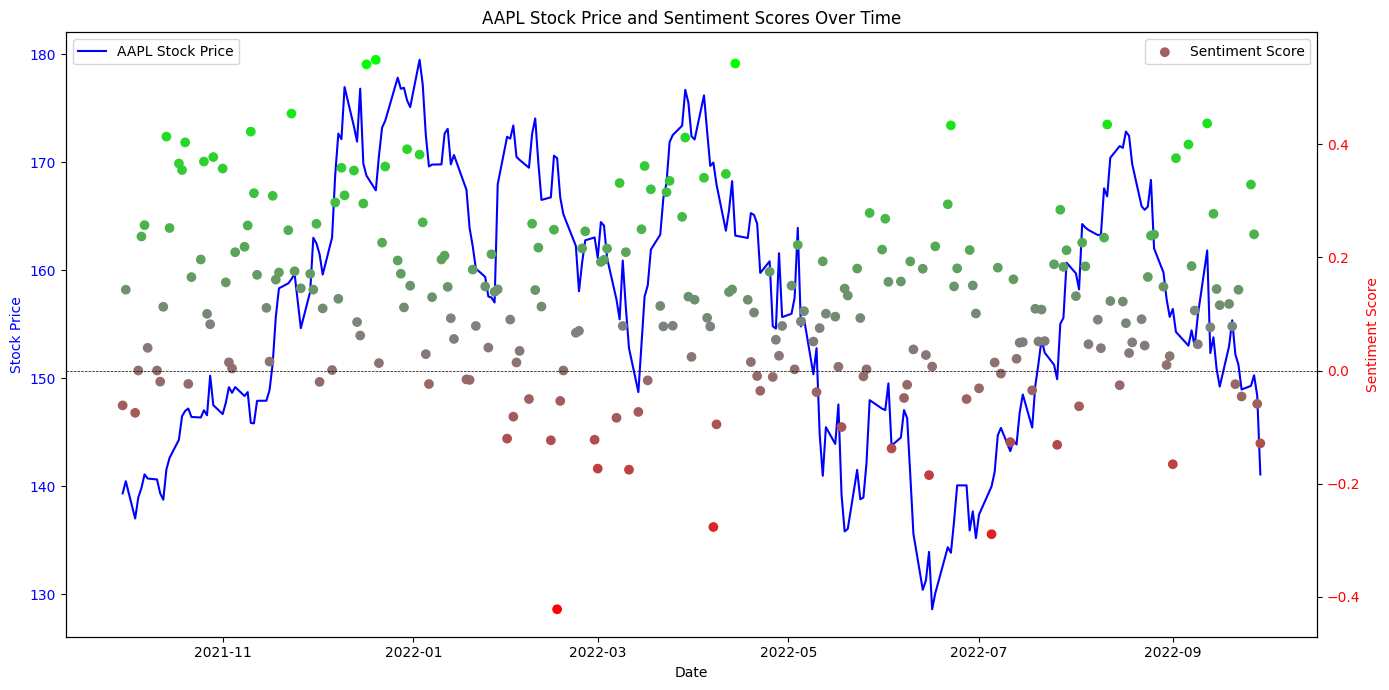

In [68]:
#%pip install seaborn
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

df_apple['Date'] = pd.to_datetime(df_apple['Date']).dt.normalize()
aapl_stock['Date'] = pd.to_datetime(aapl_stock['Date']).dt.normalize()

# Check date ranges of both dataframes
print("aapl_stock Date Range:", aapl_stock['Date'].min(), "to", aapl_stock['Date'].max())
print("df_apple Date Range:", df_apple['Date'].min(), "to", df_apple['Date'].max())

# Filter df_apple to only include dates within the aapl_stock date range
df_apple_filtered = df_apple[(df_apple['Date'] >= aapl_stock['Date'].min()) & (df_apple['Date'] <= aapl_stock['Date'].max())]

# Aggregate sentiment scores by taking the mean for each date
df_apple_agg = df_apple_filtered.groupby('Date').agg({'score': 'mean'}).reset_index()

# Merge the aggregated df_apple with aapl_stock on Date
df_merged = pd.merge(aapl_stock, df_apple_agg, on='Date', how='inner')

# Check number of rows in the merged dataframe
print("Number of rows in df_merged:", len(df_merged))

# Define a custom color map
colors = [(1, 0, 0), (0.5, 0.5, 0.5), (0, 1, 0)]  # R -> Gray -> G
n_bins = 100  # Discretize the color map into 100 bins
cmap_name = 'sentiment_cmap'
sentiment_cmap = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

# Normalize the sentiment scores to [0, 1] for color mapping
norm = plt.Normalize(df_merged['score'].min(), df_merged['score'].max())
sm = plt.cm.ScalarMappable(cmap=sentiment_cmap, norm=norm)
df_merged['color'] = df_merged['score'].apply(lambda x: sm.to_rgba(x))

# Plotting
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot stock prices (e.g., Adj Close) on the primary y-axis
sns.lineplot(x='Date', y='Adj Close', data=df_merged, ax=ax1, color='blue', label='AAPL Stock Price')
ax1.set_ylabel('Stock Price', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Plot sentiment scores on the secondary y-axis
ax2 = ax1.twinx()
ax2.scatter(df_merged['Date'], df_merged['score'], color=df_merged['color'], label='Sentiment Score')
ax2.axhline(y=0.0, color='black', linestyle='--', linewidth=0.5)  # Add horizontal line at sentiment score 0.0
ax2.set_ylabel('Sentiment Score', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Title and legends
plt.title('AAPL Stock Price and Sentiment Scores Over Time')
fig.tight_layout()
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

In [ ]:
# NOTE: This code is only to process both Apple's and Tesla's stock.
# This code takes longer to do. I (Kian) will work with both stocks in the near future. For now, it's just Apple.

df_apple = df_tweets[df_tweets["Stock Name"] == "AAPL"]

# Filter for Tesla tweets and sample 5056 tweets
df_tesla = df_tweets[df_tweets["Stock Name"] == "TSLA"].sample(n=5056, random_state=1)

# Concatenate the Apple and sampled Tesla tweets
df_apple_tesla = pd.concat([df_apple, df_tesla]).reset_index(drop=True)

# Display the resulting DataFrame
print(df_apple_tesla)